In [3]:
import pandas as pd
data_frame = pd.read_csv('data.csv') 

In [4]:
data_frame.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

## Observation 
Based on the observation of dataframe we can come to a conclusion that my dataset have null values in some of the fields.

In [6]:
len(data_frame['Wage'].value_counts())

144

In [7]:
data_frame.isna().sum()

Unnamed: 0                      0
ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST            

## Observations
As you can see there are lot of missing values in my dataset. I have to clean it before perform any operations.

In [8]:
data_frame['Wage1'] = data_frame['Wage'].apply(lambda x: x.strip().split('K'))
data_frame['Wage2'] = data_frame['Wage1'].apply(lambda x: x[0].split('€'))

data_frame['Wage3'] = data_frame['Wage2'].apply(lambda x: int(x[1])*1000)


In [9]:
data_frame.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [10]:
correlation = data_frame.corr()

In [11]:
print(correlation['Age'].sort_values())

ID                         -0.739208
Unnamed: 0                 -0.454846
Potential                  -0.253312
Jersey Number              -0.241156
Acceleration               -0.158667
SprintSpeed                -0.151682
Balance                    -0.089877
Agility                    -0.019395
Dribbling                   0.010166
Skill Moves                 0.027649
Weak Foot                   0.059867
Finishing                   0.068660
Positioning                 0.082443
BallControl                 0.084969
Stamina                     0.097793
GKDiving                    0.101277
SlidingTackle               0.103089
GKReflexes                  0.103313
GKKicking                   0.104964
GKHandling                  0.106419
GKPositioning               0.116402
StandingTackle              0.119745
Crossing                    0.130545
ShortPassing                0.132894
Penalties                   0.139535
Wage3                       0.141145
Volleys                     0.142472
M

## Cleaning the dataset
As you can see we have created new feature "wage3" by modifing the wage feature which as type object "€134k" into 134000 of type float.

## Observations on correlations
After finding the correlation between the features "Age" and "Wage3" -- It shows me poor correlationship between them.
So i am going with independant varibale as "Age' and dependant variable as "Overall" with the correlation factor as 0.45.


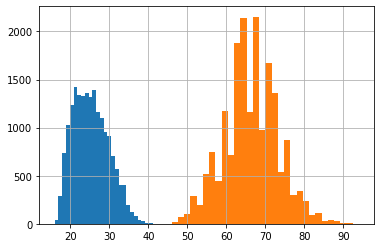

In [14]:
import matplotlib.pyplot as plt
data_frame['Age'].hist(bins=30)
data_frame['Overall'].hist(bins=30)
plt.show()


## Observations
Based on the histograms we can correlate that the overall performance of a player could peak at the age of 20-30

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C5B2948AC8>,
      dtype=object)

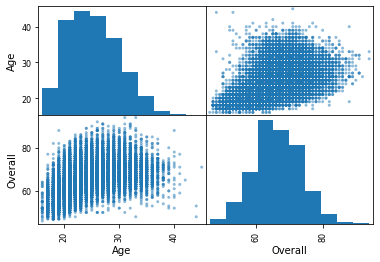

In [15]:
from pandas.plotting import scatter_matrix
attributes = ['Age', 'Overall']
scatter_matrix(data_frame[attributes])

## Cleaning a dataset
As seen from an isna() function I have come to a conclusion that the dataset have null values in fields which are not of atmost importance in my prediction.

## Spliting the data into training and test set

In [16]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data_frame, test_size=0.2, random_state=123)
print(len(train_set), len(test_set))
print(train_set.head())
print(test_set.head())

14565 3642
       Unnamed: 0      ID         Name  Age  \
10274       10274  203347     E. Tønne   27   
4773         4773  214021  F. Torijano   29   
9345         9345  177793    G. Tansey   29   
12266       12266  225330     I. Sayan   25   
1385         1385  188536     S. Hanni   27   

                                                Photo Nationality  \
10274  https://cdn.sofifa.org/players/4/19/203347.png      Norway   
4773   https://cdn.sofifa.org/players/4/19/214021.png    Colombia   
9345   https://cdn.sofifa.org/players/4/19/177793.png     England   
12266  https://cdn.sofifa.org/players/4/19/225330.png      Turkey   
1385   https://cdn.sofifa.org/players/4/19/188536.png     Algeria   

                                      Flag  Overall  Potential  \
10274  https://cdn.sofifa.org/flags/36.png       65         65   
4773   https://cdn.sofifa.org/flags/56.png       70         70   
9345   https://cdn.sofifa.org/flags/14.png       66         66   
12266  https://cdn.sofifa.o

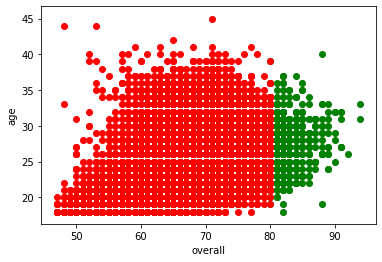

In [22]:
import matplotlib.pyplot as plt
import numpy as np

#Filter by age first
adult_height = np.ma.masked_where(data_frame["Age"]<18, data_frame["Overall"])

#Split into male and female
female_height = np.ma.masked_where(data_frame["Overall"]>80, adult_height)
male_height = np.ma.masked_where(data_frame["Overall"]<80, adult_height)
plt.scatter(x=male_height, y=data_frame["Age"], marker="o", c="green") 
plt.scatter(x=female_height, y=data_frame["Age"], marker="o", c="red")
plt.xlabel('overall')
plt.ylabel('age')
plt.show()